In [98]:
import pandas as pd

data = pd.read_pickle('final_data_with_speed.pkl')

data = data[ ['Date','District', 'Time Period', 'Average Traffic condition_x', 'WEATHER', 'PER CAPITA INCOME', 'Day', 'Crime Rate', 'dayOfWeek', 'SPEED', 'PER CAPITA INCOME '] ]

data = data.sort_values(by = ['Day'])

data = data.reset_index(drop=True)

data

,Date,District,Time Period,Average Traffic condition_x,WEATHER,PER CAPITA INCOME,Day,Crime Rate,dayOfWeek,SPEED,PER CAPITA INCOME
0,2013-01-01 09:00:00,1,morning,free flow,Sunny,High,2013-01-01,0.007843,weekday,21.565701,65526
1,2013-01-01 03:00:00,9,evening,free flow,Sunny,Medium,2013-01-01,0.031373,weekday,25.681297,22694
2,2013-01-01 08:00:00,9,morning,free flow,Sunny,Medium,2013-01-01,0.021176,weekday,25.681297,22694
3,2013-01-01 08:00:00,9,morning,free flow,Sunny,Medium,2013-01-01,0.021176,weekday,25.681297,22694
4,2013-01-01 02:00:00,9,evening,free flow,Sunny,Low,2013-01-01,0.031373,weekday,25.286455,13089
5,2013-01-01 11:38:00,8,morning,medium,Sunny,Low,2013-01-01,0.010980,weekday,19.971505,16134
6,2013-01-01 00:20:00,12,evening,medium,Sunny,High,2013-01-01,0.025098,weekday,19.440945,44689
7,2013-01-01 08:00:00,18,morning,medium,Sunny,High,2013-01-01,0.012549,weekday,17.940303,88669
8,2013-01-01 09:00:00,18,morning,medium,Sunny,High,2013-01-01,0.012549,weekday,17.940303,88669
9,2013-01-01 00:15:00,9,evening,free flow,Sunny,Low,2013-01-01,0.031373,weekday,25.286455,13089


In [99]:
from sklearn.model_selection import train_test_split
import numpy as np
X = data[['PER CAPITA INCOME ','SPEED']]
y = np.log(data['Crime Rate'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Root mean squared error = 0.4211
Slope Coefficients: [ -1.66606979e-06   3.52695273e-03]
Intercept: -4.03874379478


In [100]:
from sklearn.model_selection import train_test_split
import numpy as np
X = data[['PER CAPITA INCOME ','SPEED']]
y = np.log(data['Crime Rate'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create lasso regression object
lasso = linear_model.LassoCV(cv=10,alphas=[0.01,0.05,0.1,0.2,0.3,0.5,1])

# Fit regression model to the training set
lasso.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = lasso.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Slope Coefficients:', lasso.coef_)
print('Intercept:', lasso.intercept_)

Root mean squared error = 0.4211
Slope Coefficients: [ -1.75935272e-06   2.59904011e-03]
Intercept: -4.01419571215


In [93]:
import pandas as pd

data = pd.read_pickle('final_data_for_classification.pkl')

data = data[ ['Date','District', 'Time Period', 'Average Traffic condition', 'WEATHER', 'PER CAPITA INCOME', 'Day', 'Crime Rate', 'dayOfWeek'] ]

data = data.sort_values(by = ['Day'])

data = data.reset_index(drop=True)

data

,Date,District,Time Period,Average Traffic condition,WEATHER,PER CAPITA INCOME,Day,Crime Rate,dayOfWeek
0,2013-01-01 00:00:00,9,evening,free flow,Sunny,Low,2013-01-01,0.031373,weekday
1,2013-01-01 08:00:00,9,morning,free flow,Sunny,Medium,2013-01-01,0.021176,weekday
2,2013-01-01 09:00:00,4,morning,free flow,Sunny,Low,2013-01-01,0.013333,weekday
3,2013-01-01 00:20:00,12,evening,medium,Sunny,High,2013-01-01,0.025098,weekday
4,2013-01-01 00:01:00,8,evening,free flow,Sunny,Low,2013-01-01,0.031373,weekday
5,2013-01-01 00:00:00,4,evening,free flow,Sunny,Low,2013-01-01,0.024314,weekday
6,2013-01-01 21:30:00,4,evening,free flow,Sunny,High,2013-01-01,0.024314,weekday
7,2013-01-01 11:38:00,8,morning,medium,Sunny,Low,2013-01-01,0.010980,weekday
8,2013-01-01 09:00:00,18,morning,medium,Sunny,High,2013-01-01,0.012549,weekday
9,2013-01-01 02:20:00,12,evening,free flow,Sunny,High,2013-01-01,0.025098,weekday


Accuracy 0.408209131772


Text(0,0.5,'Test accuracy')

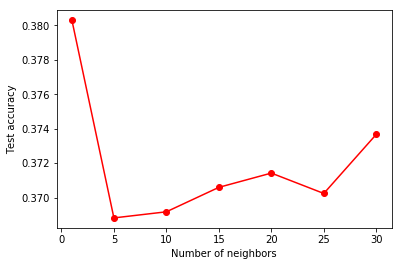

In [94]:
tmp_data = data[['PER CAPITA INCOME', 'Crime Rate']]

from sklearn.model_selection import train_test_split

Y = tmp_data['PER CAPITA INCOME']
X = tmp_data.drop('PER CAPITA INCOME', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

Accuracy 0.755500354862


Text(0,0.5,'Test accuracy')

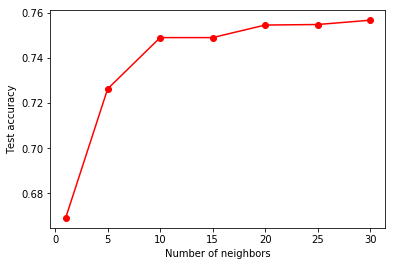

In [95]:
tmp_data = data[['Average Traffic condition', 'Crime Rate']]

from sklearn.model_selection import train_test_split

Y = tmp_data['Average Traffic condition']
X = tmp_data.drop('Average Traffic condition', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

Accuracy 0.528743789922


Text(0,0.5,'Test accuracy')

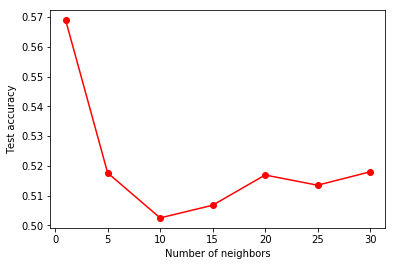

In [96]:
tmp_data = data[['WEATHER', 'Crime Rate']]

from sklearn.model_selection import train_test_split

Y = tmp_data['WEATHER']
X = tmp_data.drop('WEATHER', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

Accuracy 0.734563520227


Text(0,0.5,'Test accuracy')

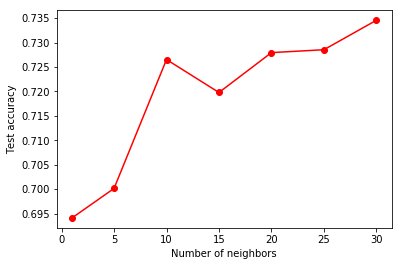

In [91]:
tmp_data = data[['dayOfWeek', 'Crime Rate']]

from sklearn.model_selection import train_test_split

Y = tmp_data['dayOfWeek']
X = tmp_data.drop('dayOfWeek', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

Accuracy 0.56967116158


Text(0,0.5,'Test accuracy')

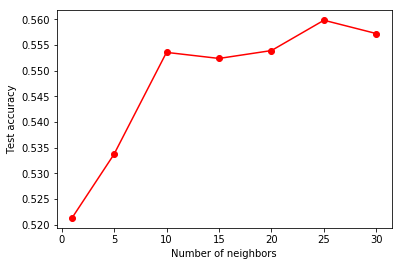

In [97]:
tmp_data = data[['Time Period', 'Crime Rate']]

from sklearn.model_selection import train_test_split

Y = tmp_data['Time Period']
X = tmp_data.drop('Time Period', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
print('Accuracy',tree_acc)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')